최고의 학습은?


# 모듈 & data import

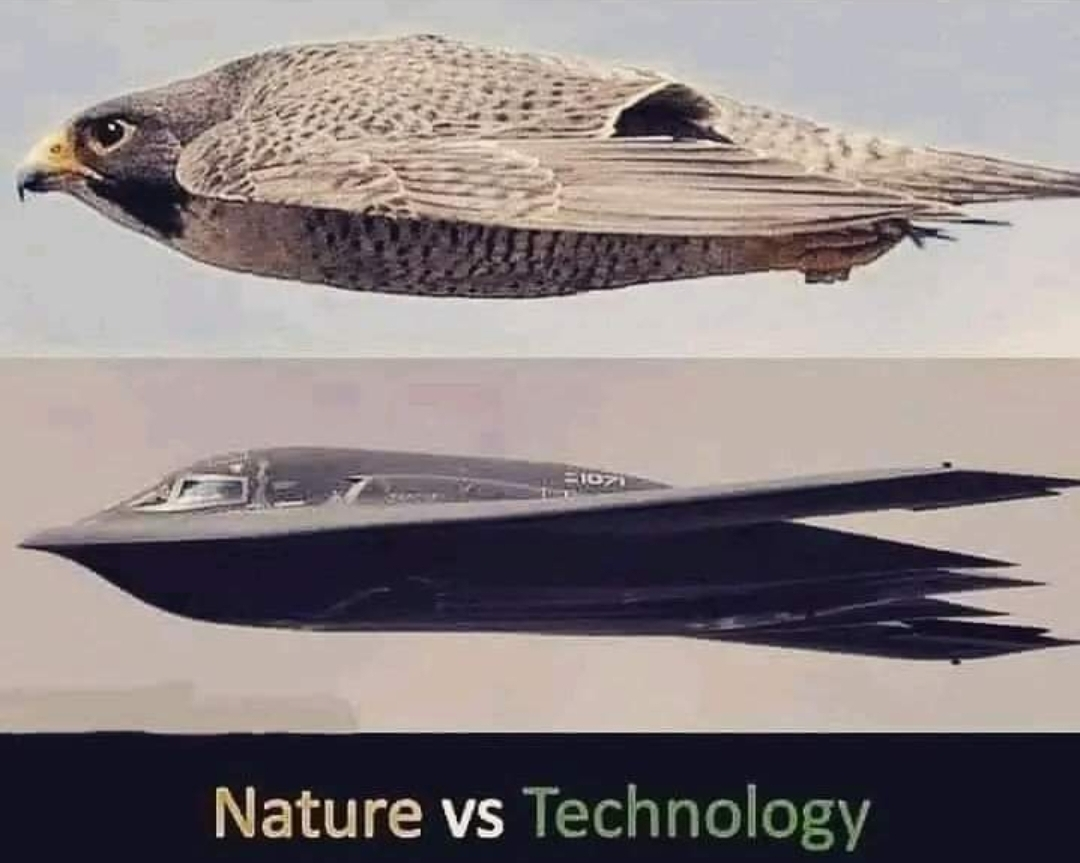

In [1]:
from IPython.display import Image
img=Image("Screenshot_20221116_101538.jpg")
img

In [2]:
import os
from os.path import join

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# origin_data 변수를 만들기
# athlete_events_path = ('C:/Users/z002t5wz/aiffel/dataton/athlete_events/athlete_events.csv')
# noc_regions_path = ('C:/Users/z002t5wz/aiffel/dataton/athlete_events/noc_regions.csv')
origin_athlete_events = pd.read_csv('athlete_events.csv')
origin_noc_regions = pd.read_csv('noc_regions.csv')

origin_athlete_events.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN



## 데이터 목록

- Content

        271116 rows and 15 columns;<br> 

        ID - Unique number for each athlete;<br>
        Name - Athlete's name;<br>
        Sex - M or F;<br>
        Age - Integer;<br>
        Height - In centimeters;<br>
        Weight - In kilograms;<br>
        Team - Team name;<br>
        NOC - National Olympic Committee 3-letter code;<br>
        Games - Year and season;<br>
        Year - Integer;<br>
        Season - Summer or Winter;<br>
        City - Host city;<br>
        Sport - Sport;<br>
        Event - Event;<br>
        Medal - Gold, Silver, Bronze, or NA.<br>

In [3]:
origin_noc_regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [4]:
origin_noc_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB



## 데이터 복사

In [5]:
data_fix=origin_athlete_events.copy()
data_remove=origin_athlete_events.copy()
data_noc= origin_noc_regions.copy()

In [6]:
#data_fix.info()


## Data결합

        기존데이터의 'NOC'-국가코드 의 값들과 나라이름을 맞춰주는 작업

In [7]:
data_fix = pd.merge(data_fix, data_noc, on='NOC', how='left')

In [8]:
# data_fix=data_fix.drop(labels =['region_x', 'notes_x', 'region_y', 'notes_y'], axis = 1)
# data_fix

In [9]:
data_fix.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN



# 결측치확인

In [10]:
data_fix.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64


## 결측치 보상여부 결정

        - 결측치의 보상방법: 
            - 각 종목별 평균값을 얻어 보상하는 방법
                - 종목별 평균을 추출하고 종목별 결측치에 채워넣는 함수실행 미완성        
            - 결측치를 '0'으로 보상하는 방법
            - 결측치를 전체 평균값으로 보상하는 방법 <선정>
            


# 한국인 출전자의 데이터 분석

In [11]:
data_kor = data_fix[(data_fix.NOC == 'KOR')] 
data_kor.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
2520,1422,Ahn Jin-Soo,M,18.0,178.0,70.0,South Korea,KOR,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,South Korea,NaN
2521,1422,Ahn Jin-Soo,M,18.0,178.0,70.0,South Korea,KOR,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN,South Korea,NaN
2522,1422,Ahn Jin-Soo,M,18.0,178.0,70.0,South Korea,KOR,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN,South Korea,NaN
2523,1422,Ahn Jin-Soo,M,18.0,178.0,70.0,South Korea,KOR,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN,South Korea,NaN
2524,1422,Ahn Jin-Soo,M,20.0,178.0,70.0,South Korea,KOR,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,South Korea,NaN



## 불필요한 데이터 drop()

In [12]:
# data_kor=data_kor.drop(labels =['region_x', 'notes_x', 'region_y', 'notes_y'], axis = 1)
# data_kor


## KOR 결측치 확인

In [13]:
data_kor.isnull().head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
2520,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
2521,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
2522,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
2523,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
2524,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True


In [14]:
data_kor.isnull().sum()

ID           0
Name         0
Sex          0
Age         54
Height     579
Weight     577
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal     3826
region       0
notes     4464
dtype: int64

In [15]:
#data_kor.columns

In [16]:
# data_kor[['Height']].apply(lambda x: x.fillna(x.mean())).astype(np.int)
# data_kor['Height']


## 전처리함수 만들기

In [17]:
def feature_eng(data_kor):

        data_kor['Sex'] = data_kor['Sex'].map({'F': 0, 'M': 1})
        data_kor['Medal'] = data_kor['Medal'].map({'Gold': 3, 'Silver': 2, 'Bronze':1, np.nan: 0})
        #data_fix=data_fix.fillna(0) 
        return data_kor


def missing_value(data_kor):
        missing_col = ['Age', 'Height', 'Weight']
        for i in missing_col:
            data_kor[[i]]=data_kor[[i]].apply(lambda x: x.fillna(x.mean())).astype(np.int)
        
        
        return data_kor

data_kor = feature_eng(data_kor)
data_kor = missing_value(data_kor)


In [18]:
#data_kor.head()

In [19]:
data_kor.isnull().sum()

ID           0
Name         0
Sex          0
Age          0
Height       0
Weight       0
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
region       0
notes     4464
dtype: int64

메달별 집계

In [20]:
g_medals_kor = data_kor[(data_kor['Medal'] == 3)]
g_medals_kor.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
6364,3567,An Byeong-Geun,1,22,172,78,South Korea,KOR,1984 Summer,1984,Summer,Los Angeles,Judo,Judo Men's Lightweight,3,South Korea,NaN
6383,3581,An Han-Bong,1,23,163,62,South Korea,KOR,1992 Summer,1992,Summer,Barcelona,Wrestling,"Wrestling Men's Bantamweight, Greco-Roman",3,South Korea,NaN
6405,3595,An Sang-Mi,0,18,155,48,South Korea,KOR,1998 Winter,1998,Winter,Nagano,Short Track Speed Skating,"Short Track Speed Skating Women's 3,000 metres...",3,South Korea,NaN
6420,3604,Viktor An,1,20,170,65,South Korea,KOR,2006 Winter,2006,Winter,Torino,Short Track Speed Skating,"Short Track Speed Skating Men's 1,000 metres",3,South Korea,NaN
6421,3604,Viktor An,1,20,170,65,South Korea,KOR,2006 Winter,2006,Winter,Torino,Short Track Speed Skating,"Short Track Speed Skating Men's 1,500 metres",3,South Korea,NaN


In [21]:
s_medals_kor = data_kor[(data_kor.Medal == 2)]
s_medals_kor.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
6363,3566,An Ba-Ul,1,22,169,66,South Korea,KOR,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Men's Half-Lightweight,2,South Korea,NaN
6431,3608,An Yeong-Su,1,20,174,70,South Korea,KOR,1984 Summer,1984,Summer,Los Angeles,Boxing,Boxing Men's Welterweight,2,South Korea,NaN
12390,6728,Baek Hyeon-Man,1,24,189,91,South Korea,KOR,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Heavyweight,2,South Korea,NaN
13854,7504,Bang Su-Hyeon,0,19,171,66,South Korea,KOR,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Women's Singles,2,South Korea,NaN
37940,19503,Cha Yeong-Cheol,1,29,172,65,South Korea,KOR,1988 Summer,1988,Summer,Seoul,Shooting,"Shooting Men's Small-Bore Rifle, Prone, 50 metres",2,South Korea,NaN


In [22]:
b_medals_kor = data_kor[(data_kor.Medal == 1)]
b_medals_kor.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
6375,3574,An Dae-Hyeon,1,25,166,67,South Korea,KOR,1988 Summer,1988,Summer,Seoul,Wrestling,"Wrestling Men's Featherweight, Greco-Roman",1,South Korea,NaN
6387,3585,An Jae-Hyeong,1,23,183,74,South Korea-2,KOR,1988 Summer,1988,Summer,Seoul,Table Tennis,Table Tennis Men's Doubles,1,South Korea,NaN
6393,3589,An Jeong-Hwa,0,27,162,62,South Korea,KOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,1,South Korea,NaN
6419,3604,Viktor An,1,20,170,65,South Korea,KOR,2006 Winter,2006,Winter,Torino,Short Track Speed Skating,Short Track Speed Skating Men's 500 metres,1,South Korea,NaN
12372,6718,Bae Min-Hee,0,20,169,56,South Korea,KOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,1,South Korea,NaN



## 한국인 출전자 데이터 결과 확인


### 연도별 선수현황

In [23]:
#data_kor.value_counts()

Text(0.5, 1.0, 'no. of Participants [Fig 3.3.3]')

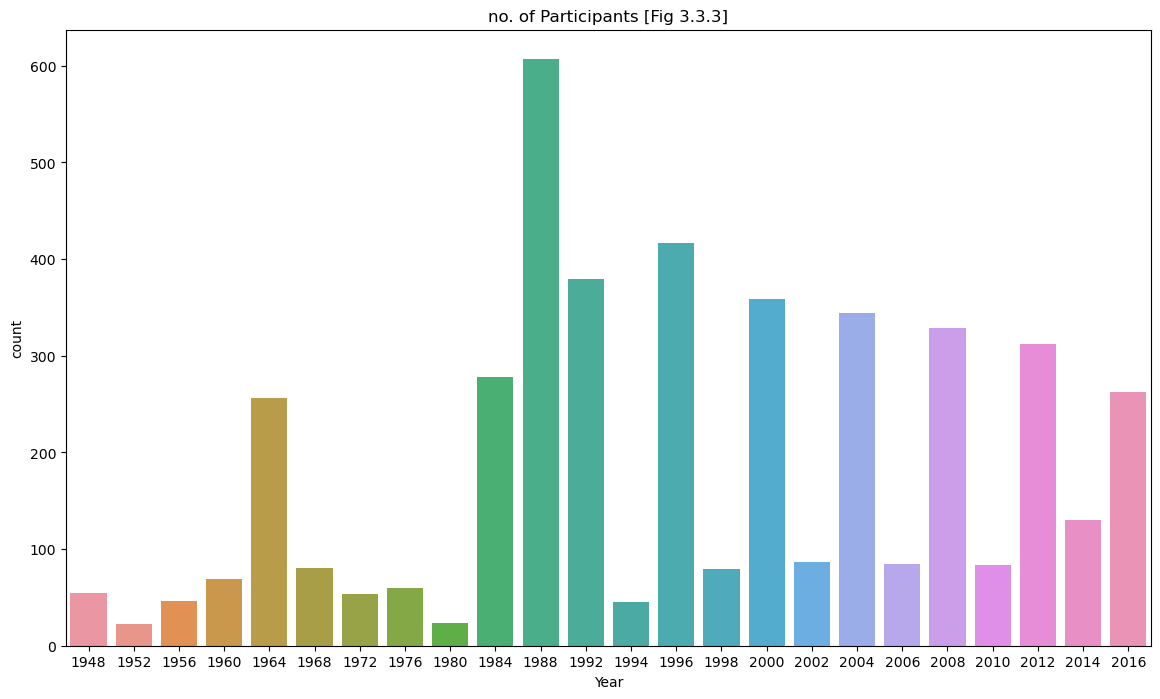

In [24]:
plt.figure(figsize=(14, 8))
plt.tight_layout()
sns.countplot(data_kor['Year']) #hue="Season"별 확인
plt.title('no. of Participants [Fig 3.3.3]')

- 주석 [fig 3.3.3] 1988올림픽 최다 참여
- 동계올림픽과 하계올림픽의 참여자수 변화추이
- 1994년 동계올림픽 출전, 꾸준히 참여자수 증가


### 나이별 출전자 수

Text(0.5, 1.0, 'Distribution of participants')

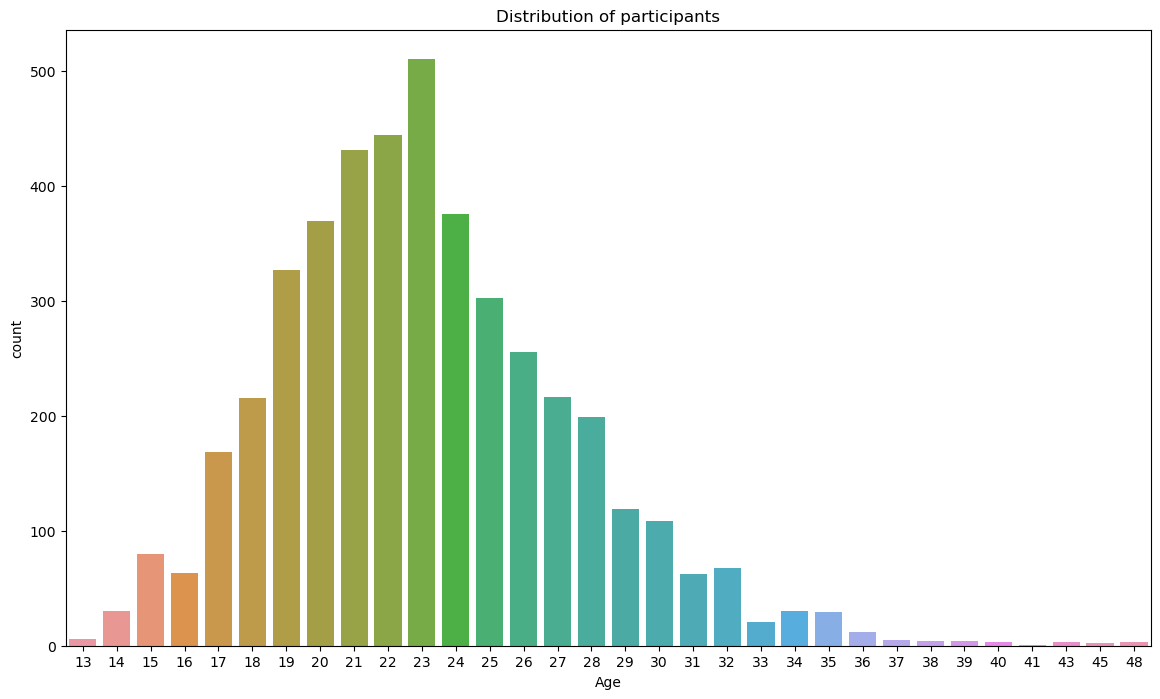

In [25]:
plt.figure(figsize=(14,8))
plt.tight_layout()
sns.countplot(data_kor['Age'])
plt.title('Distribution of participants')

- 출전 선수중 가장어린 13세의 선수와 연장자인 48세의 선수가 참가한 것을 확인 할 수 있으며, 전반적인 10대 후반에서 30대 초반사이에 선수들이 분포하고 있습니다. 


### 성별 출전자

Text(0.5, 1.0, 'no. of participants by Sex')

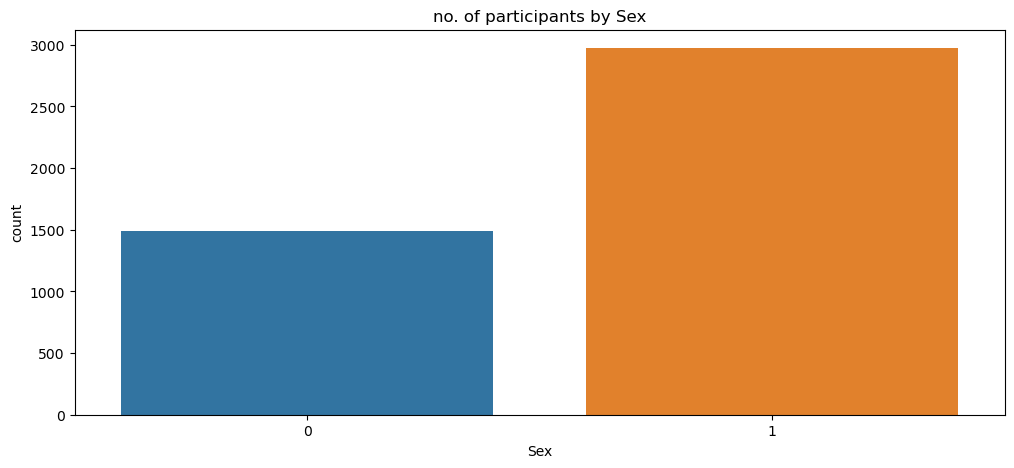

In [26]:
plt.figure(figsize=(12, 5))
plt.tight_layout()
sns.countplot(data_kor['Sex'])
plt.title('no. of participants by Sex')


### 전체 메달집계

In [27]:
kor_medal_count = data_kor['Medal']
kor_medal_count.value_counts()

0    3826
2     232
3     221
1     185
Name: Medal, dtype: int64

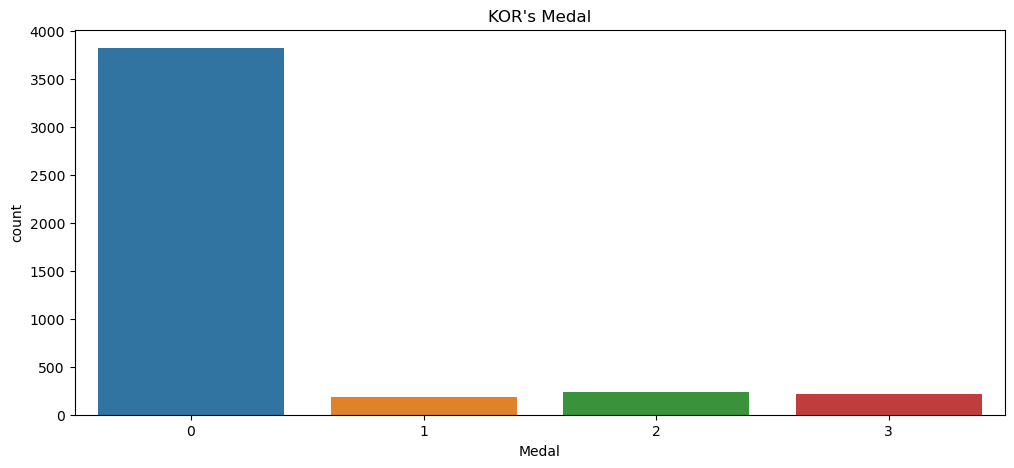

In [28]:
plt.figure(figsize=(12, 5))
sns.countplot(kor_medal_count)
plt.title("KOR's Medal")
plt.show()

메달따기 힘들죠?


### 나이별 금메달

Text(0.5, 1.0, 'Distribution of Bronze Medals')

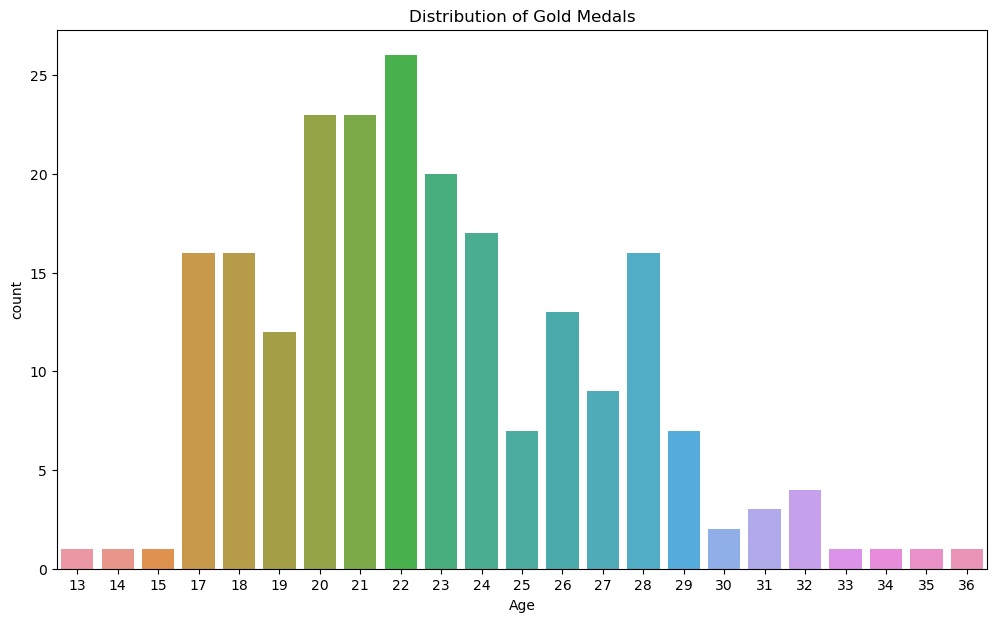

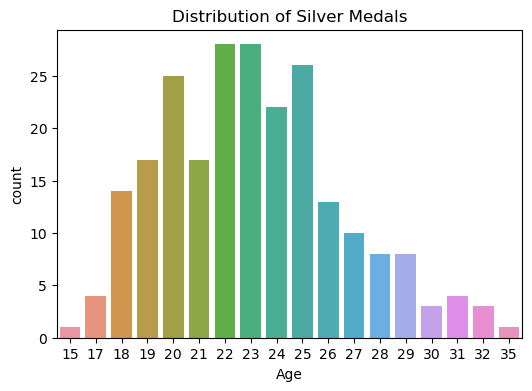

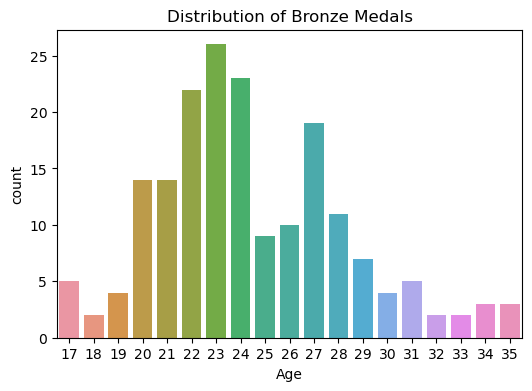

In [29]:
plt.figure(figsize=(12,7))
plt.tight_layout()
sns.countplot(g_medals_kor['Age'])
plt.title('Distribution of Gold Medals')


plt.figure(figsize=(6,4))
plt.tight_layout()
sns.countplot(s_medals_kor['Age'])
plt.title('Distribution of Silver Medals')


plt.figure(figsize=(6,4))
plt.tight_layout()
sns.countplot(b_medals_kor['Age'])
plt.title('Distribution of Bronze Medals')

- 주석: 메달추이상황을 보니 어떤 종목들에서 출전하고 있는지 궁금해 집니다. 우리 선수들의 참여종목을 살펴보겠습니다.


### 시간에 따른 종목별 출전자 분포

In [30]:
#data_kor['Sport'].value_counts()

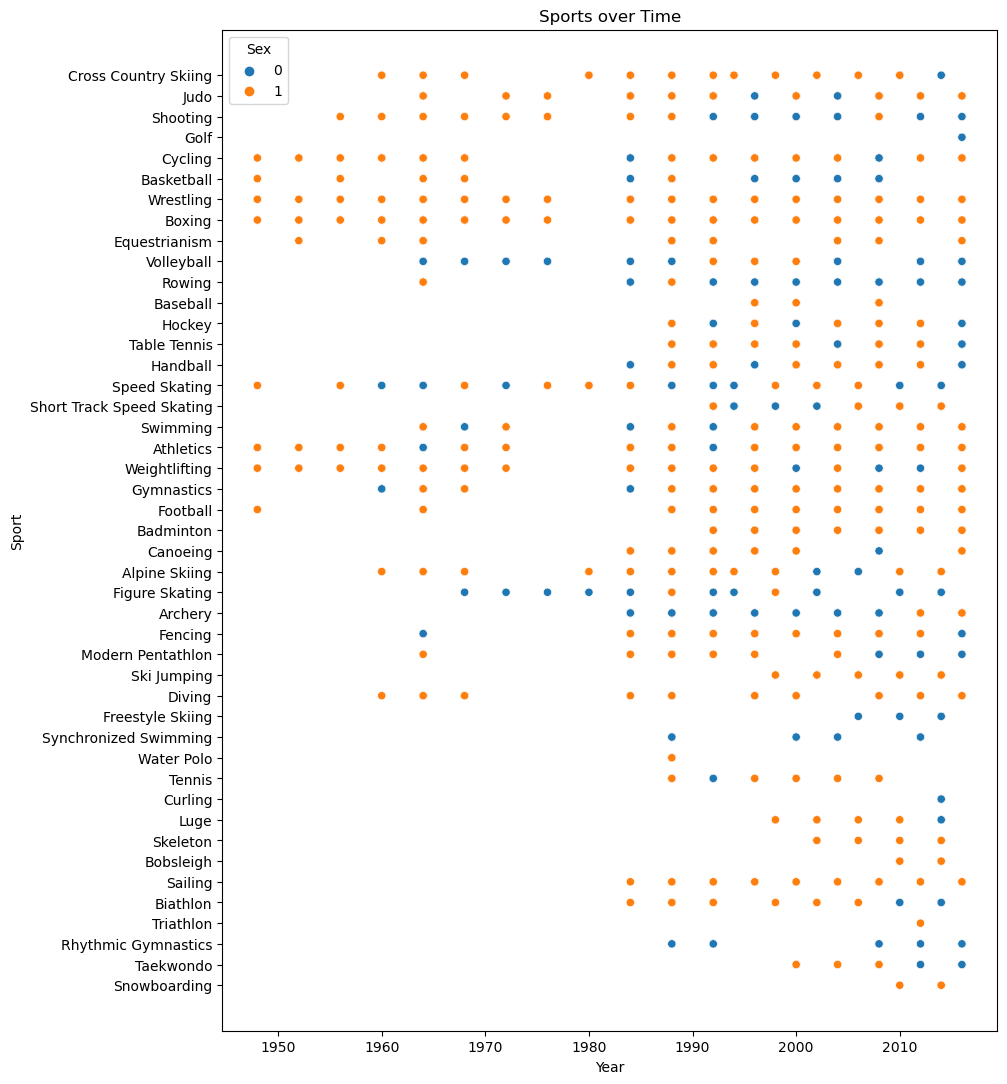

In [31]:
# 'Year'에 따른  참여'Sport'를 남녀별 분포도로 확인
plt.rcParams['figure.figsize'] = [10, 13] # setting figure size
sns.scatterplot(data=data_kor, x='Year', y= 'Sport', hue='Sex')
#sns.set(rc={'figure.figsize':(20,10)})
plt.title('Sports over Time')
plt.show()

- 경제발전에 따른 스포츠 참여종목수가 늘어남을 알 수 있다, 특히 1988년도 88올림픽 이후 다양한 종목에 출전하고 있다

- 


### 한국인 첫 금메달 리스트는 누구일까요?

In [32]:
g_medals_kor = data_kor[(data_kor['Medal'] == 3)]
g_medals_kor.sort_values(by='Year').head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
264787,132508,Yang Jeong-Mo,1,23,165,62,South Korea,KOR,1976 Summer,1976,Summer,Montreal,Wrestling,"Wrestling Men's Featherweight, Freestyle",3,South Korea,NaN


- 1976년 양정모 선수가 레슬링에서 우리나라에 첫 금메달을 안겨주었습니다.

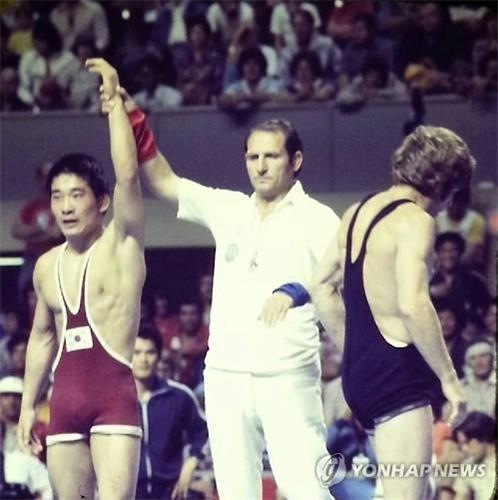

In [33]:
img_yjm=Image("다운로드.jpg")
img_yjm

In [34]:
first_medalist=g_medals_kor.sort_values(by = 'Year', inplace = True, ascending=True)
first_medalist


# 메달과 신체조건 (나이, 키, 몸무게 등) 상관 관계 알아보기

In [35]:
#data_kor

In [36]:
#data_kor=data_kor.drop(labels =['region_x', 'notes_x', 'region_y', 'notes_y'], axis = 1)

In [37]:
#data_kor.columns

In [38]:
#data_kor.head()


## 상관관계 분석(한국)

In [39]:
# data_kor의 상관관계분석하기
corr_data_kor = data_kor[['Sex', 'Age', 'Height', 'Weight', 'Year', 'Medal']].corr().round(2)
corr_data_kor

,Sex,Age,Height,Weight,Year,Medal
Sex,1.00,0.22,0.40,0.42,-0.17,-0.12
Age,0.22,1.00,0.19,0.22,0.12,0.00
Height,0.40,0.19,1.00,0.78,0.09,0.02
Weight,0.42,0.22,0.78,1.00,0.07,0.04
Year,-0.17,0.12,0.09,0.07,1.00,0.12
Medal,-0.12,0.00,0.02,0.04,0.12,1.00


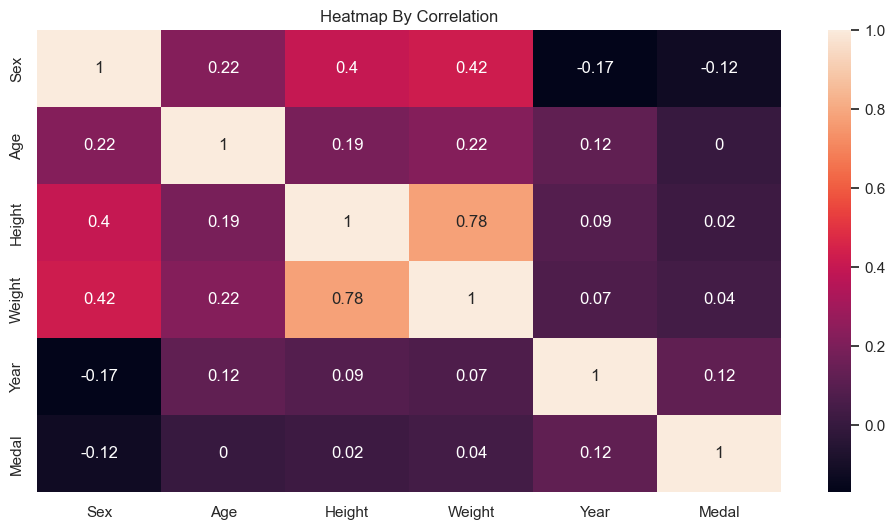

In [40]:
# 상관관계분석 결과 시각화하기 
'''각 인자들의 상관관계가 높다고 해서 인과관계가 있다는 것은 아님을 유의'''

sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(data = corr_data_kor, annot=True)
plt.title('Heatmap By Correlation')
plt.show()

- 전반적으로 상관계수들이 <0.3 이하로 집중되어 있다. 메달과 신체적 조건과의 상관관계가 있지 않음을 알수 있다.
- 개인의 노력은 수치화 할 수 없다!!!

## 상관관계분석 (전체)

In [41]:
# 전체 원데이터 상관관계분석하기
corr_data_fix = data_fix[['Sex', 'Age', 'Height', 'Weight', 'Year', 'Medal']].corr().round(2)
corr_data_fix

,Age,Height,Weight,Year
Age,1.00,0.14,0.21,-0.12
Height,0.14,1.00,0.80,0.05
Weight,0.21,0.80,1.00,0.02
Year,-0.12,0.05,0.02,1.00


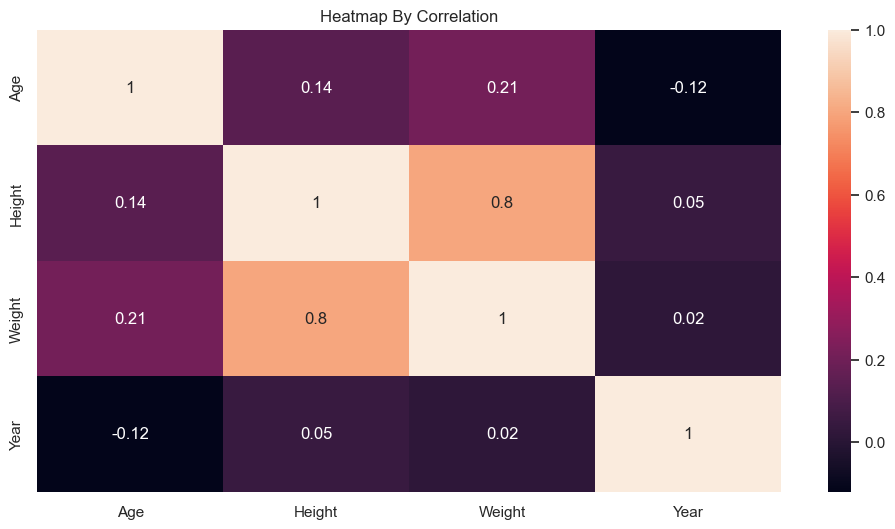

In [42]:
# 상관관계분석 결과 시각화하기 
'''각 인자들의 상관관계가 높다고 해서 인과관계가 있다는 것은 아님을 유의'''

sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(data = corr_data_fix, annot=True)
plt.title('Heatmap By Correlation')
plt.show()


## 군집분석

        'Age','Height'등의 신체조건과의 상관관계가 있을까라는 의문으로 해당데이터를 기준으로 유사도를 확인해 본다


### 모듈 Import

In [43]:
# 군집분석

# sklearn라이브러리 중 필요한 모듈을 호출
from sklearn.cluster import KMeans
from sklearn import preprocessing

#data_kor 중 'Age',' Height', 'Weight'를 골라내 temp_var로 저장
temp_var = data_kor[['Height', 'Age']] #이중괄호[[]] dafaframe으로 반환
print(type(temp_var))
temp_var.head()


<class 'pandas.core.frame.DataFrame'>


,Height,Age
2520,178,18
2521,178,18
2522,178,18
2523,178,18
2524,178,20


In [44]:
#temp_var.isnull().sum()


### 데이터 정규화

In [45]:
# sklearn의 preprocessing을 이용해 Feature의 scale이 다른 각 값들을 정규화
temp_var = preprocessing.StandardScaler().fit(temp_var).transform(temp_var)


### 모델 setting

In [46]:
# 군집분석을 하기 위해 Kmeans 변수를 만들고 군집분석 초기 모델을 할당
Kmeans = KMeans(n_clusters=3, # 군집 개수는 3개 도출
                init='k-means++', # 모델 초기화 방법은 K-means++ 사용
                n_init=10, # 모델의 초기화 횟수 (초기화-학습 10회 반복 후 최선의 결과 선택)
                verbose=True, # 군집분석 수행 중 각 단계별 메세지 출력 여부
                max_iter=10000, # 최대 반복 횟수
                random_state=1111 # 랜덤시드 고정
                               )


### fitting

In [47]:
# 할당된 군집분석 모델에 temp_var를 적용(fit)
Kmeans.fit(temp_var)

Initialization complete
Iteration 0, inertia 4405.1185244880235
Iteration 1, inertia 4059.3555925007067
Iteration 2, inertia 4033.5777541060743
Iteration 3, inertia 3981.6138057095122
Iteration 4, inertia 3962.8477908917585
Iteration 5, inertia 3954.0278631816745
Iteration 6, inertia 3948.2241183486735
Iteration 7, inertia 3943.872340233982
Iteration 8, inertia 3942.432624000375
Iteration 9, inertia 3941.5116001317483
Iteration 10, inertia 3941.04378094966
Converged at iteration 10: center shift 5.457816342067297e-05 within tolerance 0.0001000000000000001.
Initialization complete
Iteration 0, inertia 5647.650500578416
Iteration 1, inertia 4850.955132998658
Iteration 2, inertia 4722.520420888353
Iteration 3, inertia 4654.1452980936565
Iteration 4, inertia 4597.167782950616
Iteration 5, inertia 4500.179653538654
Iteration 6, inertia 4369.3811774696005
Iteration 7, inertia 4216.716449275236
Iteration 8, inertia 4117.158276532334
Iteration 9, inertia 4078.0361079953805
Iteration 10, inerti

KMeans(max_iter=10000, n_clusters=3, random_state=1111, verbose=True)


### Clustering

In [48]:
# 분류된 각 군집이름(Label)을 변수 Cluster_label로 할당
cluster_label = Kmeans.labels_

# 할당된 Cluster_label을 temp_var1의 Cluster열 값으로 할당
data_kor['Cluster'] = pd.DataFrame(cluster_label)
data_kor.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Cluster
2520,1422,Ahn Jin-Soo,1,18,178,70,South Korea,KOR,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,0,South Korea,NaN,0.0
2521,1422,Ahn Jin-Soo,1,18,178,70,South Korea,KOR,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,0,South Korea,NaN,0.0
2522,1422,Ahn Jin-Soo,1,18,178,70,South Korea,KOR,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,0,South Korea,NaN,1.0
2523,1422,Ahn Jin-Soo,1,18,178,70,South Korea,KOR,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,0,South Korea,NaN,1.0
2524,1422,Ahn Jin-Soo,1,20,178,70,South Korea,KOR,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,0,South Korea,NaN,2.0


In [49]:
# data_kor의 Cluster열의 각 고유값 계산하기
data_kor['Cluster'].value_counts()

1.0    6
0.0    3
2.0    2
Name: Cluster, dtype: int64

In [50]:
temp_var = data_kor.groupby('Cluster').mean()
temp_var

,ID,Sex,Age,Height,Weight,Year,Medal
Cluster,,,,,,,
0.0,1422.0,1.0,18.666667,178.0,70.0,1992.666667,0.0
1.0,1422.0,1.0,22.000000,178.0,70.0,1996.000000,0.0
2.0,1422.0,1.0,20.000000,178.0,70.0,1994.000000,0.0


In [51]:
#temp_var.T


### 군집별 시각화


#### Cluster별 군집화

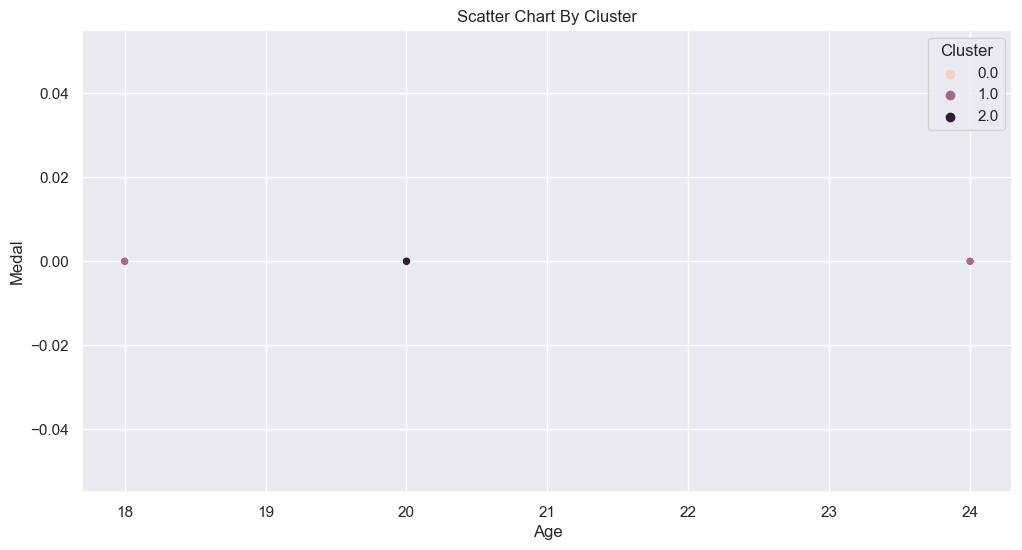

In [52]:
# 각 군집별 산포도로 시각화

sns.scatterplot(data=data_kor, x='Age', y='Medal', hue='Cluster')
plt.title('Scatter Chart By Cluster')
plt.show()

- Cluster별 주요 구분기준은 나이이며, 18.6세, 20.4세, 19세를 기준으로 세 그룹으로 나뉘어지며 이에 따른 메달과의 상관관계는 '0'으로 나타난다. 


#### Hight & Weight 별 메달분포

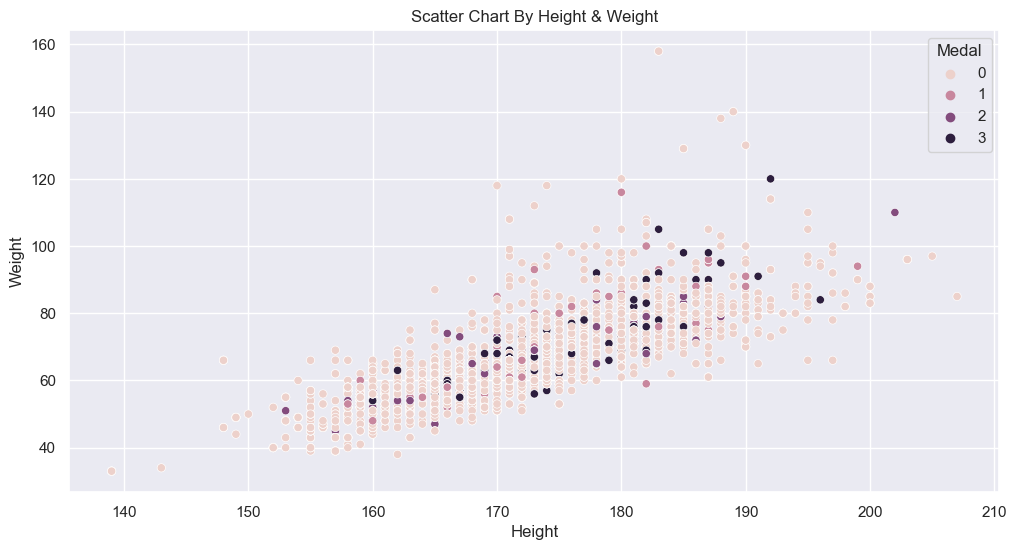

In [53]:
# 각 군집별 산포도로 시각화

sns.scatterplot(data=data_kor, x='Height', y='Weight', hue='Medal')
plt.title('Scatter Chart By Height & Weight')
plt.show()


## 상관관계 및 Clustering 결론: 
        다른 분석자료에서 키와 몸무게에 따른 메달과의 상관관계를 선형적인 관계로 파악하였으나,,,,키와 몸무게는 이미 선형적인 관계이기 때문에 메
        달과의 상관성이 있는 것 처럼 보이지만 현 분석에서는 상관관계 및 신체조건에 따른 Clustering이 의미 없음을 보여준다. 비메달리스트의 키와 
        몸무게 역시 선형관계를 보이고 있으므로 분석을 뒷받침하고 있다.
        
        하지만 두 분석모델은 비학습된모델입니다. 따라서 모델을 학습 시킨 후 결과가 어떻게 나올지? 또다른 궁금증을 주었습니다.  
        


# ...next

In [54]:
data_fix

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN



## 데이터 전처리

In [55]:
def feature_eng(data_fix):

        data_fix['Sex'] = data_fix['Sex'].map({'F': 0, 'M': 1})
        data_fix['Medal'] = data_fix['Medal'].map({'Gold': 3, 'Silver': 2, 'Bronze':1, np.nan: 0})
        #data_fix=data_fix.fillna(0) 
 
        return data_fix


def missing_value(data_fix):
        missing_col = ['Age', 'Height', 'Weight']
        for i in missing_col:
            data_fix[[i]]=data_fix[[i]].apply(lambda x: x.fillna(x.mean())).astype(np.int)
        
        
        return data_fix

data_fix = feature_eng(data_fix)
data_fix = missing_value(data_fix)


In [56]:
data_fix.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal          0
region       370
notes     266077
dtype: int64

In [57]:
data_fix.head(50)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,1,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,China,NaN
1,2,A Lamusi,1,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,China,NaN
2,3,Gunnar Nielsen Aaby,1,24,175,70,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0,Denmark,NaN
3,4,Edgar Lindenau Aabye,1,34,175,70,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,3,Denmark,NaN
4,5,Christine Jacoba Aaftink,0,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,Netherlands,NaN
5,5,Christine Jacoba Aaftink,0,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",0,Netherlands,NaN
6,5,Christine Jacoba Aaftink,0,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,0,Netherlands,NaN
7,5,Christine Jacoba Aaftink,0,25,185,82,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",0,Netherlands,NaN
8,5,Christine Jacoba Aaftink,0,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,0,Netherlands,NaN
9,5,Christine Jacoba Aaftink,0,27,185,82,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",0,Netherlands,NaN


In [58]:
data_fix['Sex'].value_counts()

1    196594
0     74522
Name: Sex, dtype: int64

## 역대 top-10 참가국

In [59]:
top_10_countries = data_fix['Team'].value_counts().nlargest(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

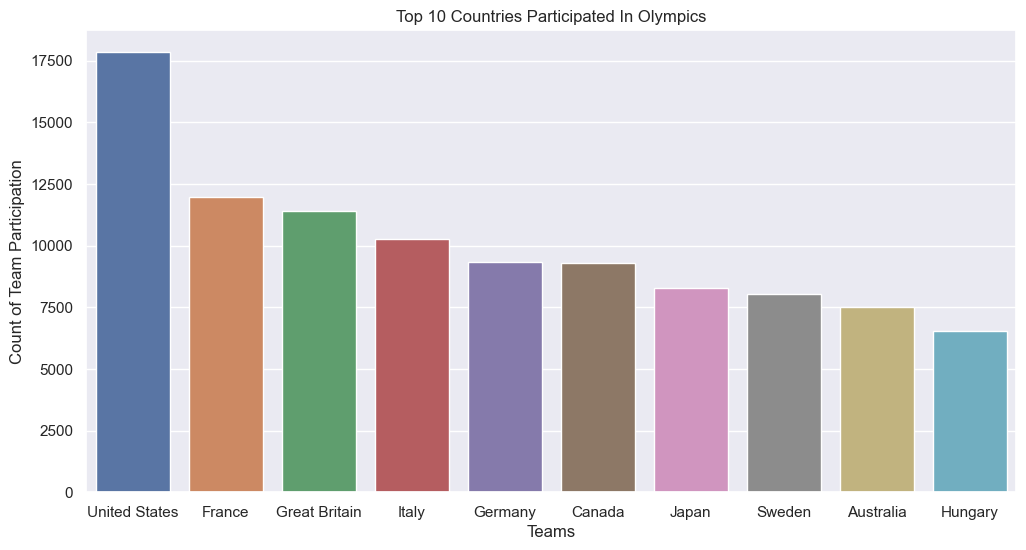

In [60]:
# plot for top 10 countries
plt.figure(figsize=(12,6))
sns.barplot(x = top_10_countries.index,y = top_10_countries)
plt.xlabel('Teams')
plt.ylabel('Count of Team Participation')
plt.title('Top 10 Countries Participated In Olympics')
plt.show()


## 하계올림픽 참가자 수 over time

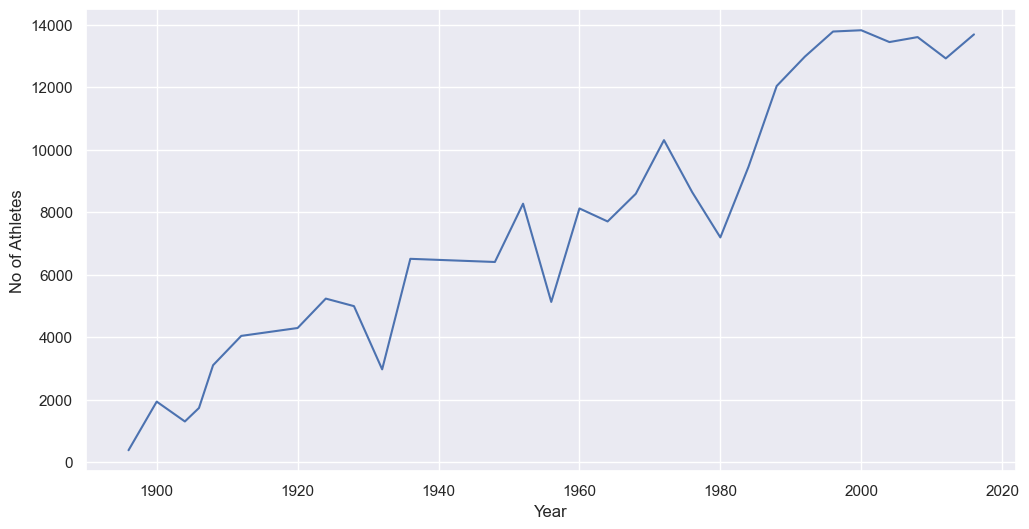

In [61]:
# Atheletes Participated in Summer Olympics
athletes_per_year = data_fix[data_fix['Season']=='Summer'].groupby('Year')['ID'].count().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=athletes_per_year, x="Year", y="ID")
plt.xlabel('Year')
plt.ylabel('No of Athletes')
plt.show()

### 금메달을 가장 많이 획득한 국가 top10

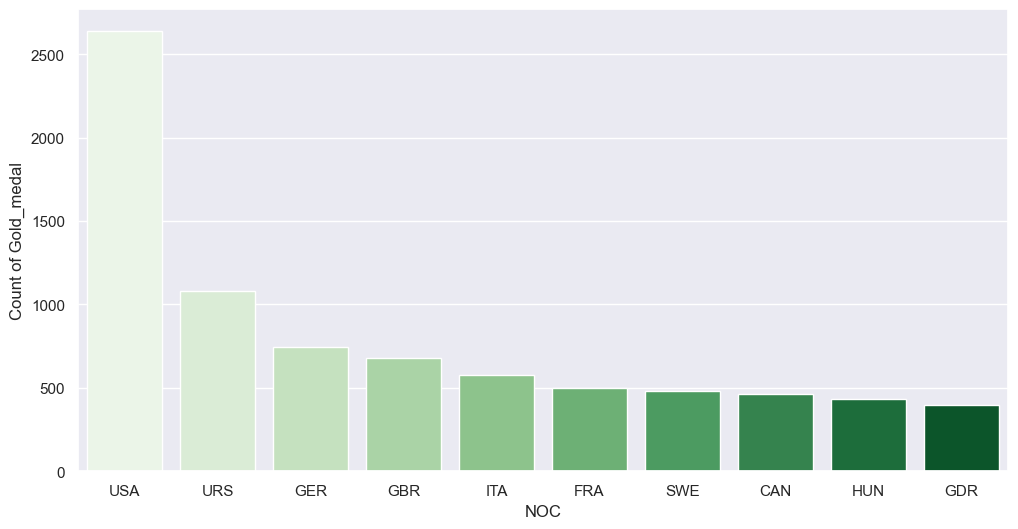

In [62]:
count_medal = pd.crosstab(index = data_fix['NOC'], columns = data_fix['Medal'])
medal_count = count_medal[[1,2,3]]
medal_count

sorted_gold=medal_count[[3]].sort_values(by=[3], ascending=False)
top10_gold = sorted_gold[:10]
top10_gold

plt.figure(figsize=(12,6))
sns.barplot(data=top10_gold, x=top10_gold.index, y=top10_gold[3], palette="Greens")
plt.xlabel('NOC')
plt.ylabel('Count of Gold_medal')
plt.show()

### 은메달을 가장 많이 획득한 국가 top10

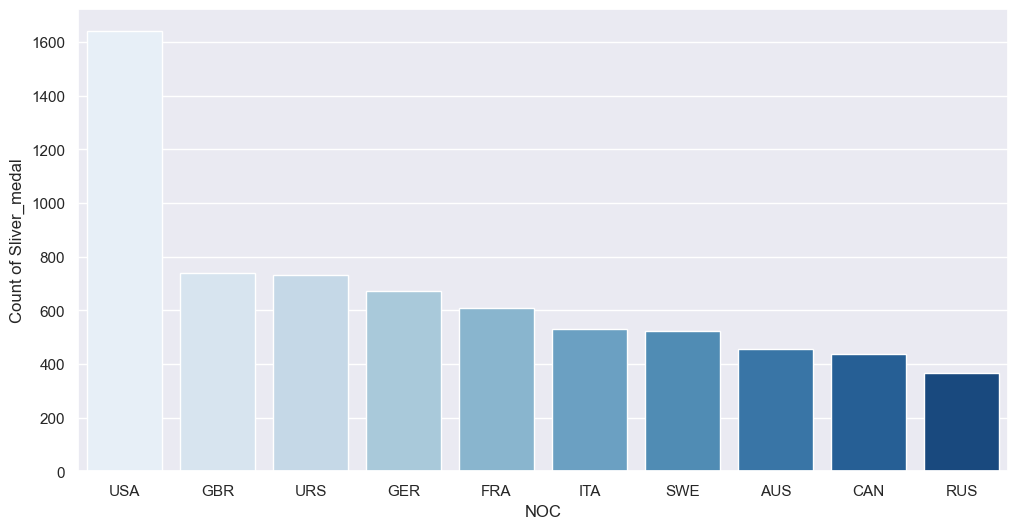

In [63]:
sorted_silver=medal_count[[2]].sort_values(by=[2], ascending=False)
top10_silver = sorted_silver[:10]
top10_silver

plt.figure(figsize=(12,6))
sns.barplot(data=top10_silver, x=top10_silver.index, y=top10_silver[2], palette="Blues")
plt.xlabel('NOC')
plt.ylabel('Count of Sliver_medal')
plt.show()

### 동메달을 가장 많이 획득한 국가 top10

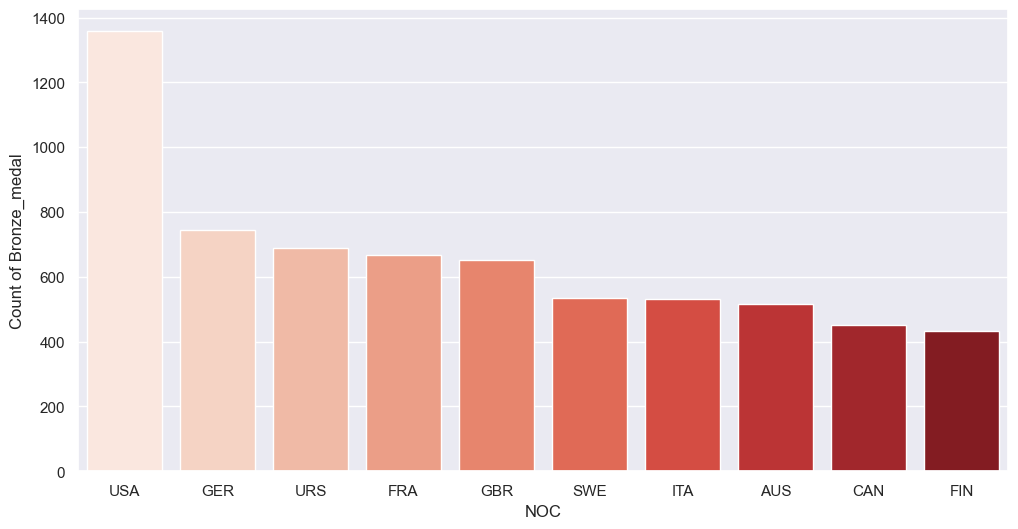

In [64]:
sorted_bronze=medal_count[[1]].sort_values(by=[1], ascending=False)
top10_bronze = sorted_bronze[:10]
top10_bronze

plt.figure(figsize=(12,6))
sns.barplot(data=top10_bronze, x=top10_bronze.index, y=top10_bronze[1], palette="Reds")
plt.xlabel('NOC')
plt.ylabel('Count of Bronze_medal')
plt.show()